In [3]:
import cv2
import tensorflow as tf
import numpy as np

In [8]:
def preprocess(image):
    # Convert the image to RGB
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    # Convert the image to a tensor
    input_tensor = tf.convert_to_tensor(image_rgb)
    
    # Resize the image to the expected size
    resized_tensor = tf.image.resize(input_tensor, [640, 640])
    
    # Add an extra dimension for the batch size
    input_tensor = tf.expand_dims(resized_tensor, 0)
    
    # Convert the tensor to tf.uint8
    input_tensor = tf.cast(input_tensor, tf.uint8)
    
    return input_tensor


In [20]:
def postprocess(outputs):
    # Get the number of detections
    num_detections = len(outputs['detection_scores'])

    # Get the detection classes and convert to numpy array
    detection_classes = outputs['detection_classes'].numpy()

    # Get the detection boxes and convert to numpy array
    detection_boxes = outputs['detection_boxes'].numpy()

    # Get the detection scores and convert to numpy array
    detection_scores = outputs['detection_scores'].numpy()

    # Filter out detections with low scores
    min_score = 0.5
    indices = np.where(detection_scores >= min_score)

    # Return filtered detections
    final_boxes = detection_boxes[indices]
    final_classes = detection_classes[indices]
    final_scores = detection_scores[indices]

    return final_boxes, final_classes, final_scores


In [62]:
class_names = [
    "person", "bicycle", "car", "motorcycle", "airplane", "bus", 
    "train", "truck", "boat", "traffic light", "fire hydrant", 
    "street sign", "stop sign", "parking meter", "bench", "bird", 
    "cat", "dog", "horse", "sheep", "cow", "elephant", "bear", 
    "zebra", "giraffe", "hat", "backpack", "umbrella", "shoe", 
    "eye glasses", "handbag", "tie", "suitcase", "frisbee", 
    "skis", "snowboard", "sports ball", "kite", "baseball bat", 
    "baseball glove", "skateboard", "surfboard", "tennis racket", 
    "bottle", "plate", "wine glass", "cup", "fork", "knife", 
    "spoon", "bowl", "banana", "apple", "sandwich", "orange", 
    "broccoli", "carrot", "hot dog", "pizza", "donut", "cake", 
    "chair", "couch", "potted plant", "bed", "mirror", "dining table", 
    "window", "desk", "toilet", "door", "tv", "laptop", "mouse", 
    "remote", "keyboard", "cell phone", "microwave", "oven", 
    "toaster", "sink", "refrigerator", "blender", "book", "clock", 
    "vase", "scissors", "teddy bear", "hair drier", "toothbrush", 
    "hair brush"
]

In [84]:
def get_top_person(boxes, classes, scores):
    # Define the class index for "person"
    person_index = class_names.index('person') + 1
    print(person_index)
    # Initialize the highest score and corresponding box and class
    highest_score = -1
    highest_box = None
    highest_class = None

    # Iterate over all the classes
    for i in range(len(classes)):
        # Check if the class is "person" and if its score is higher than the highest score found so far
        if classes[i] == person_index and scores[i] > highest_score:
            highest_score = scores[i]
            highest_box = boxes[i]
            highest_class = classes[i]

    # Return the highest scoring "person" box and class
    return highest_box, highest_class, highest_score

In [64]:
def visualize_detections(image, boxes, classes, scores):

    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = np.array(image, dtype=np.uint8)
    
    for i in range(len(boxes)):
        box = boxes[i]
        class_id = classes[i]
        score = scores[i]

        # Get the bounding box coordinates
        ymin, xmin, ymax, xmax = box

        # Convert coordinates to integer
        ymin = int(ymin * image.shape[0])
        xmin = int(xmin * image.shape[1])
        ymax = int(ymax * image.shape[0])
        xmax = int(xmax * image.shape[1])

        # Draw the bounding box on the image
        cv2.rectangle(image, (xmin, ymin), (xmax, ymax), (0, 255, 0), 2)

        # Prepare the label
        label = f"{class_names[int(class_id)-1]}: {score:.2f}"

        # Put the label on the image
        cv2.putText(image, label, (xmin, ymin-10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 255, 0), 2)

    # Show the image
    plt.figure(figsize=(10, 10))
    plt.imshow(image)
    plt.axis('off')
    plt.show()

# Use the function


In [5]:
model = tf.saved_model.load('./model/')

In [6]:
print(model.signatures['serving_default'].inputs)

[<tf.Tensor 'input_tensor:0' shape=(1, None, None, 3) dtype=uint8>, <tf.Tensor 'unknown:0' shape=() dtype=resource>, <tf.Tensor 'unknown_0:0' shape=() dtype=resource>, <tf.Tensor 'unknown_1:0' shape=() dtype=resource>, <tf.Tensor 'unknown_2:0' shape=() dtype=resource>, <tf.Tensor 'unknown_3:0' shape=() dtype=resource>, <tf.Tensor 'unknown_4:0' shape=() dtype=resource>, <tf.Tensor 'unknown_5:0' shape=() dtype=resource>, <tf.Tensor 'unknown_6:0' shape=() dtype=resource>, <tf.Tensor 'unknown_7:0' shape=() dtype=resource>, <tf.Tensor 'unknown_8:0' shape=() dtype=resource>, <tf.Tensor 'unknown_9:0' shape=() dtype=resource>, <tf.Tensor 'unknown_10:0' shape=() dtype=resource>, <tf.Tensor 'unknown_11:0' shape=() dtype=resource>, <tf.Tensor 'unknown_12:0' shape=() dtype=resource>, <tf.Tensor 'unknown_13:0' shape=() dtype=resource>, <tf.Tensor 'unknown_14:0' shape=() dtype=resource>, <tf.Tensor 'unknown_15:0' shape=() dtype=resource>, <tf.Tensor 'unknown_16:0' shape=() dtype=resource>, <tf.Tenso

In [9]:
image_path = "./test_img/people01.jpg"
image = cv2.imread(image_path)
input_frame = preprocess(image)

# Run the model
outputs = model(input_frame)

In [19]:
outputs.keys()

dict_keys(['raw_detection_boxes', 'detection_multiclass_scores', 'detection_classes', 'detection_boxes', 'raw_detection_scores', 'detection_anchor_indices', 'detection_scores'])

In [90]:
boxes, classes, scores = postprocess(outputs)


In [91]:
print(classes)

[ 1.  1. 34.]


In [93]:
boxes, classes, scores = get_top_person(boxes, classes, scores)

1


In [88]:
print(boxes, classes, scores)

[0.21779895 0.36369452 0.9890728  0.52153206] 1.0 0.8170321


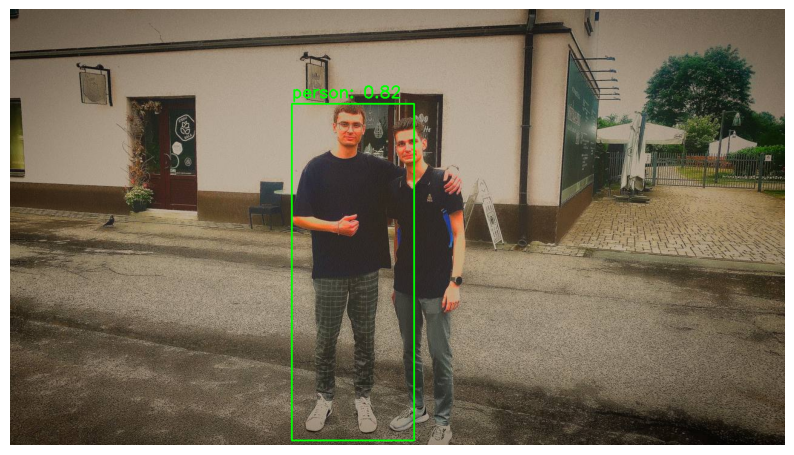

In [98]:
visualize_detections(image, [boxes], [classes], [scores])
